In [4]:
# extend the width of the notebook cells (not used in jupyter lab)
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:98% !important; }</style>"))
#display(HTML("<style>.output_result { width:95% !important; }</style>"))

# autoreload allows changes to modules on the fly (no need for reloading them after a change in the code)
%load_ext autoreload
%autoreload 2

In [8]:
from smeft_data import *
from smeft_plots import *
from smeft_train import *
import pickle
sys.path.insert(0, '..')
import tools.user as user

In [14]:
user.model_directory

'/groups/hephy/cms/oskar.rothbacher/NN/models/'

## data

In [251]:
file_names = [
    f'/scratch-cbe/users/robert.schoefbeck/TMB/postprocessed/gen/v2/tschRefPointNoWidthRW/tschRefPointNoWidthRW_{n_file}.root:Events'
    for n_file in range(10)]

In [252]:
scalar_branches, vector_branches = get_branch_names()

In [253]:
scalar_events, vector_events, weights = load_data(file_names=file_names)

In [254]:
len(scalar_branches)

44

In [255]:
w0 = weights[:,0,np.newaxis]

In [256]:
w1_0 = weights[:,1,np.newaxis]/w0

In [257]:
dataset = JointDataset(x=scalar_events, y=(w0,w1_0))

In [258]:
data_loader = DataLoader(dataset, batch_size=1000)

## training

In [243]:
model = MLP(input_nfeatures=44, num_classes=1, hidden_layers=(300,100,100))
model

MLP(
  (mlp): Sequential(
    (0): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=44, out_features=300, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=300, out_features=100, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=100, out_features=100, bias=True)
    (8): ReLU()
    (9): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [263]:
file_name = '/groups/hephy/cms/oskar.rothbacher/DNN_models/model_24_10_22/epoch_621.pkl'

In [233]:
#with open(file_name, 'wb') as f:
#    pickle.dump(model, f)

In [264]:
with open(file_name, 'rb') as f:
    model = pickle.load(f)

In [265]:
model

MLP(
  (mlp): Sequential(
    (0): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=44, out_features=300, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=300, out_features=100, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=100, out_features=100, bias=True)
    (8): ReLU()
    (9): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [74]:
'''
learn_lin_weight(model=model,
                 data_loader=data_loader,
                 n_epoch=500,
                 learning_rate=1e-5,
                 print_every=10,
                 save_every=None)
'''

'\nlearn_lin_weight(model=model,\n                 data_loader=data_loader,\n                 n_epoch=500,\n                 learning_rate=1e-5,\n                 print_every=10,\n                 save_every=None)\n'

## Evaluation

In [75]:

for i, (x,y,z) in enumerate(data_loader):
    if i>0:break
    for i in range(100):
        print((model(x))[i], z[i])
    #print(model(x))
    #print((y[:,1]/y[:,0]))
    #print(y)

tensor([-0.0975], grad_fn=<SelectBackward0>) tensor([-0.0769])
tensor([-0.1372], grad_fn=<SelectBackward0>) tensor([-0.1417])
tensor([-0.1660], grad_fn=<SelectBackward0>) tensor([-0.1715])
tensor([-0.1382], grad_fn=<SelectBackward0>) tensor([-0.1294])
tensor([-0.0562], grad_fn=<SelectBackward0>) tensor([-0.0494])
tensor([-0.1023], grad_fn=<SelectBackward0>) tensor([-0.1061])
tensor([-0.0602], grad_fn=<SelectBackward0>) tensor([-0.0617])
tensor([-0.0760], grad_fn=<SelectBackward0>) tensor([-0.0722])
tensor([-0.0538], grad_fn=<SelectBackward0>) tensor([-0.0611])
tensor([-0.2283], grad_fn=<SelectBackward0>) tensor([-0.2292])
tensor([-0.0679], grad_fn=<SelectBackward0>) tensor([-0.0449])
tensor([-0.0560], grad_fn=<SelectBackward0>) tensor([-0.0542])
tensor([-0.1480], grad_fn=<SelectBackward0>) tensor([-0.1514])
tensor([-0.2796], grad_fn=<SelectBackward0>) tensor([-0.2856])
tensor([-0.0415], grad_fn=<SelectBackward0>) tensor([-0.0739])
tensor([-0.2092], grad_fn=<SelectBackward0>) tensor([-0

In [76]:
test_file_names = [
    f'/scratch-cbe/users/robert.schoefbeck/TMB/postprocessed/gen/v2/tschRefPointNoWidthRW/tschRefPointNoWidthRW_{n_file}.root:Events'
    for n_file in range(50,51)]
test_scalar_events, test_vector_events, test_weights = load_data(file_names=test_file_names)
test_w0 = test_weights[:,0,np.newaxis]
test_w1_0 = test_weights[:,1,np.newaxis]/test_w0

In [266]:
pred=model(torch.tensor(scalar_events)).detach().numpy()
test_pred=model(torch.tensor(test_scalar_events)).detach().numpy()

### distribution of the true and learned relative linear weight

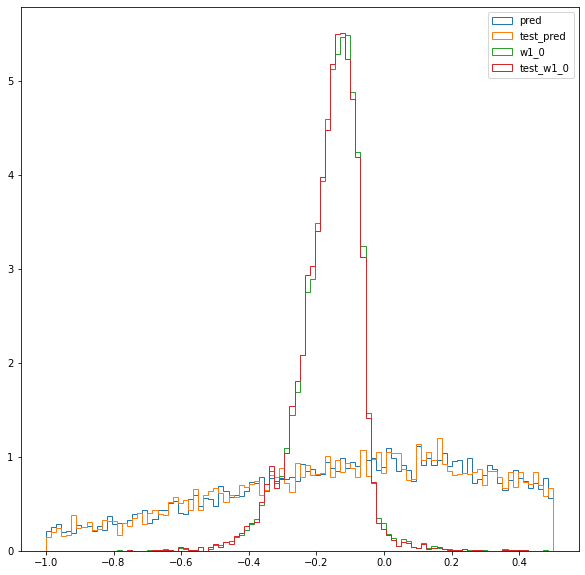

In [260]:
bins=np.histogram(np.hstack((pred,w1_0)),range=(-1.0,0.5),  bins=100)[1]
plt.figure(figsize=[10,10])
plt.hist(pred, histtype='step', bins=bins, range=(-1.0,0.5), label='pred', log=False, density=True)
plt.hist(test_pred, histtype='step', bins=bins, range=(-1.0,0.5), label='test_pred', log=False, density=True)
plt.hist(w1_0, histtype='step', bins=bins, range=(-1.0,0.5), label='w1_0', log=False, density=True)
plt.hist(test_w1_0, histtype='step', bins=bins, range=(-1.0,0.5), label='test_w1_0', log=False, density=True)
plt.legend()
plt.show()

### distribution of absolute errors

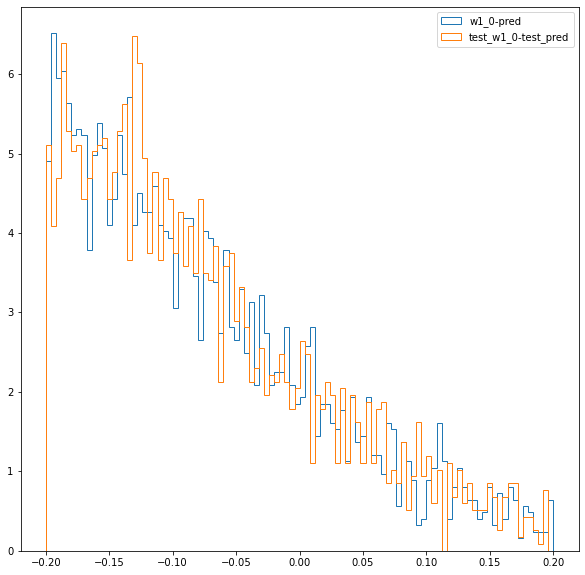

In [240]:
plt.figure(figsize=[10,10])
plt.hist((w1_0-pred), bins=100, histtype='step', label='w1_0-pred', range=(-0.2,0.2), log=False, density=True)
plt.hist((test_w1_0-test_pred), bins=100, histtype='step',label='test_w1_0-test_pred', range=(-0.2,0.2), log=False, density=True)
plt.legend()
plt.show()

### 2d hist truth vs prediction

In [248]:
from matplotlib import colors

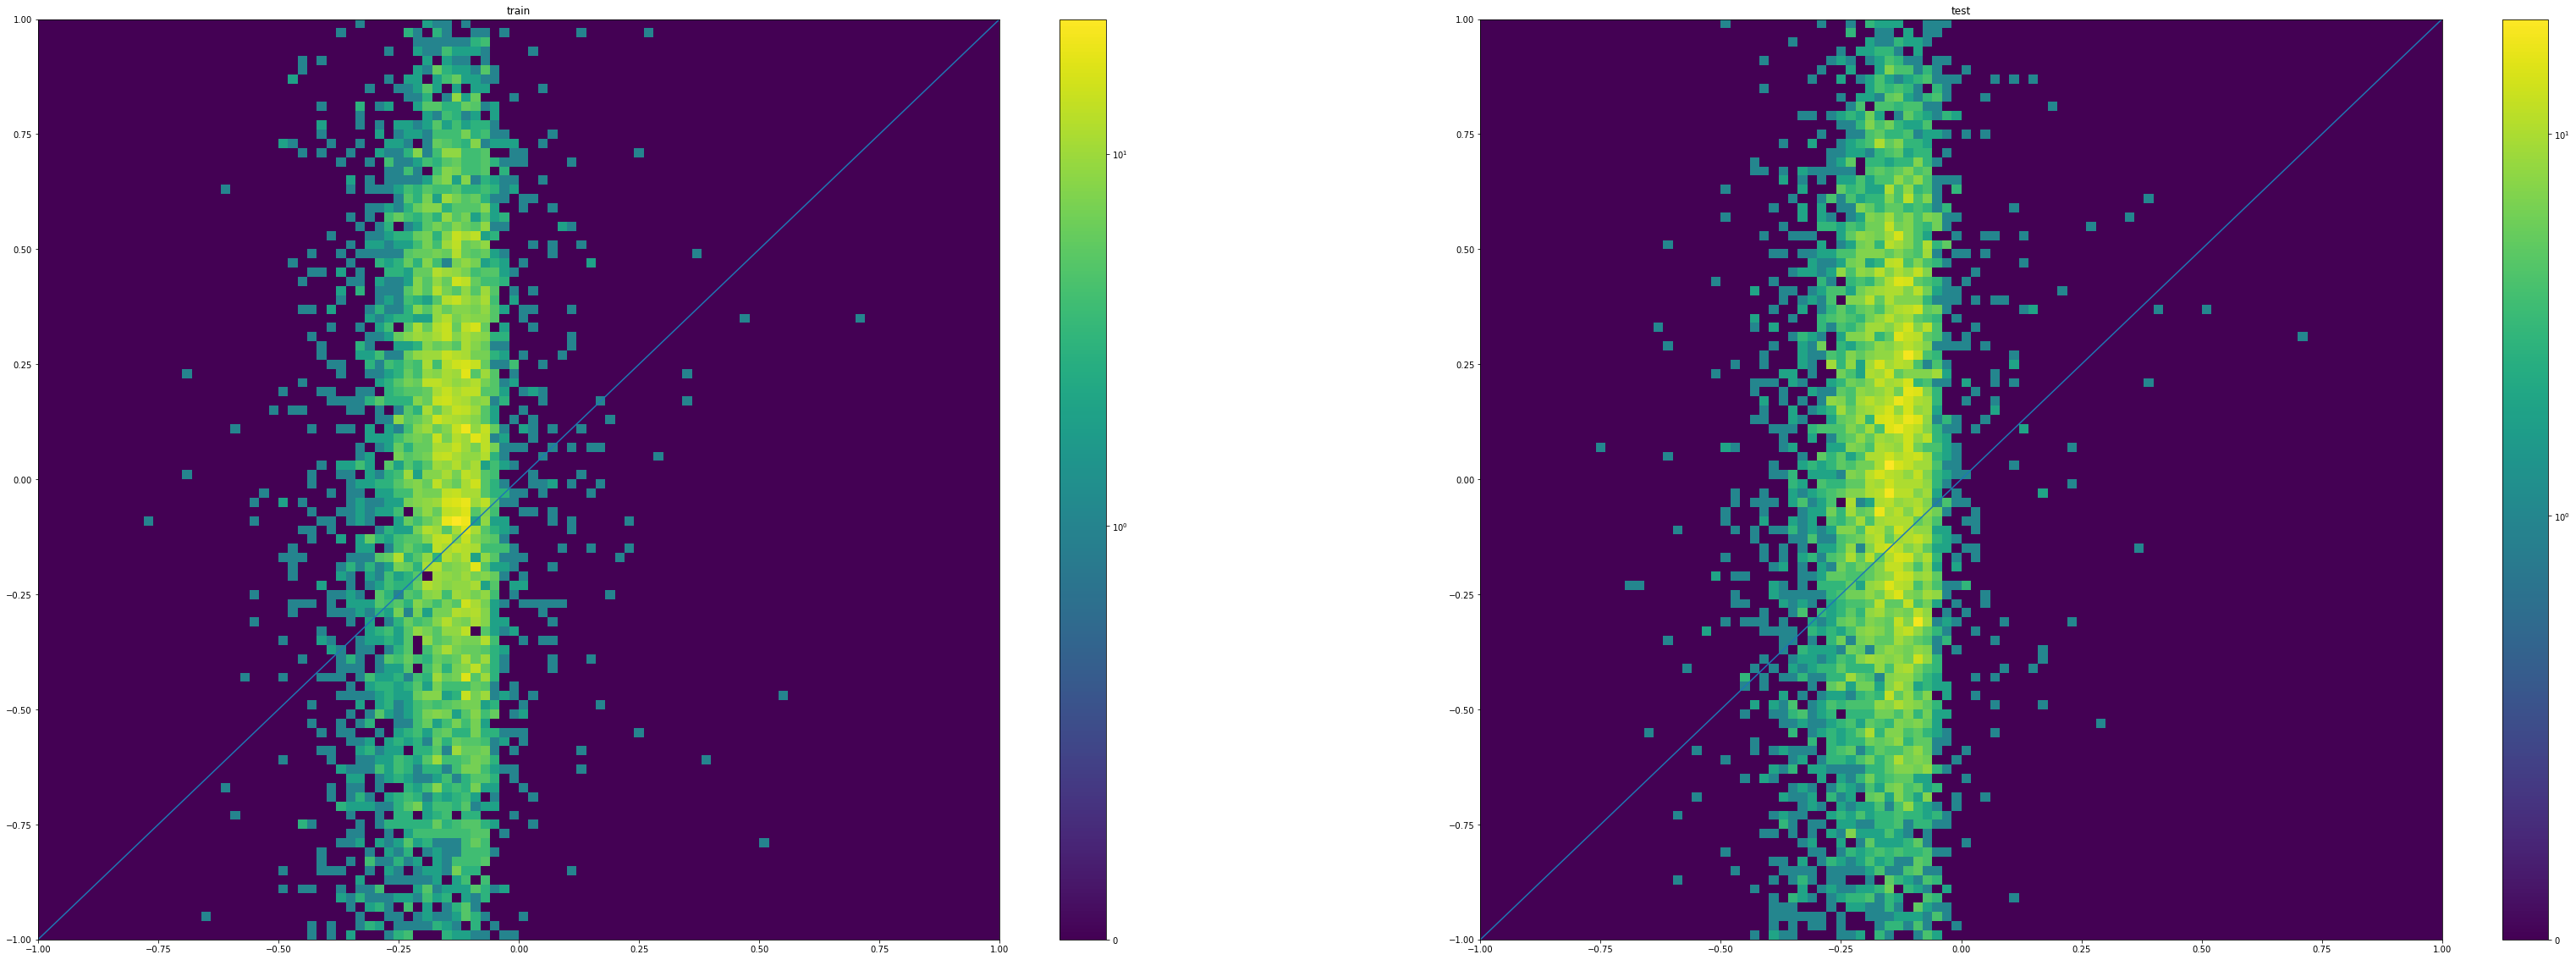

In [249]:
plt.subplots(figsize=[56,20])
plt.subplot(1,2,1)
plt.hist2d(w1_0.flatten(), pred.flatten(), range=[[-1.,1.],[-1.,1.]], bins=100, norm=colors.SymLogNorm(1))
plt.plot([-1,1],[-1,1])
plt.colorbar()
plt.title('train')
plt.subplot(1,2,2)
plt.hist2d(test_w1_0.flatten(), test_pred.flatten(), range=[[-1.,1.],[-1.,1.]], bins=100, norm=colors.SymLogNorm(1))
plt.plot([-1,1],[-1,1])
plt.colorbar()
plt.title('test')
plt.show()

## Histograms

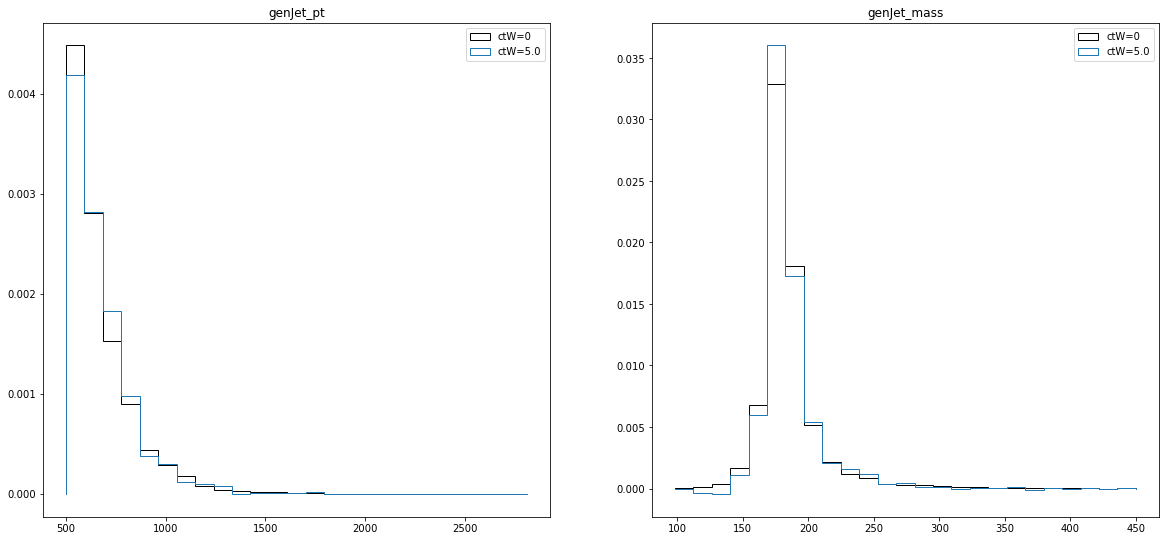

In [82]:
plot_eft_hists(data=scalar_events[:,:2],
               branch_list=scalar_branches[:2],
               weights=weights,
               bins=25,
               theta=(5.0,))

In [83]:
quantiles_005 = np.linspace(0,1,21)

In [84]:
quantiles_005

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [85]:
bins=np.quantile(scalar_events[:,0],quantiles_005)

(array([348., 348., 347., 348., 348., 347., 348., 348., 347., 348., 348.,
        347., 348., 348., 347., 348., 348., 347., 348., 348.]),
 array([ 97.97180939, 158.92755356, 165.69374695, 169.87679672,
        172.50345154, 174.19093323, 175.51641846, 176.5849968 ,
        177.68976135, 178.75755005, 180.0050354 , 181.27487564,
        182.72507935, 184.39390564, 186.35439606, 188.71705246,
        191.96775818, 197.36225357, 205.47188416, 226.27833557,
        449.94284058]),
 [<matplotlib.patches.Polygon at 0x7f80d56f7af0>])

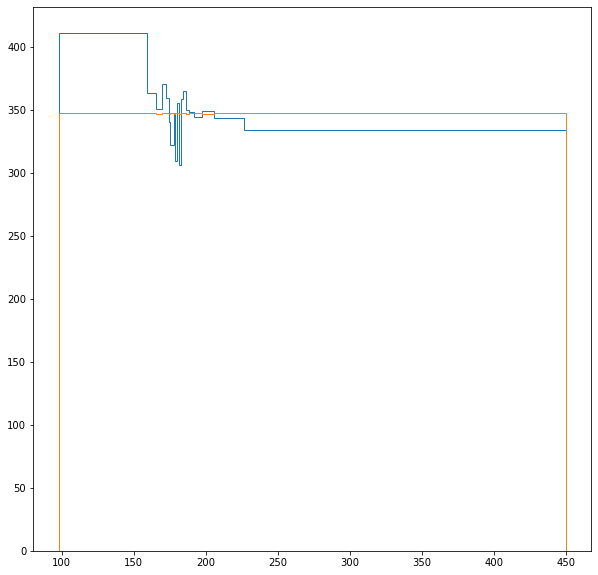

In [86]:
i=1
bins=np.quantile(scalar_events[:,i],quantiles_005)
plt.figure(figsize=[10,10])
plt.hist(scalar_events[:,i], weights=1+(weights[:,0]-weights[:,0].mean())/weights[:,0].std(), bins=bins, histtype='step', density=False)
plt.hist(scalar_events[:,i], bins=bins, histtype='step', density=False)

## LLR plots

In [87]:
def llr_poisson(n,lmbd_0, lmbd):
    return n * np.log(lmbd/lmbd_0) - lmbd -lmbd_0

In [88]:
n = 10; lmbd_0 = 10
x_plot = np.linspace(lmbd_0-3*np.sqrt(lmbd_0), lmbd_0+3*np.sqrt(lmbd_0), 1000)

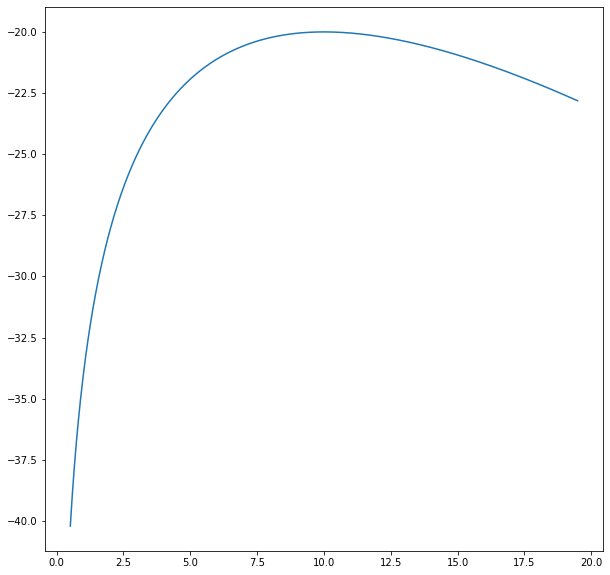

In [89]:
plt.figure(figsize=[10,10])
plt.plot(x_plot, llr_poisson(n, lmbd_0, x_plot))

## test statistics

In [90]:
np.linspace(0,1,21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [95]:
SF=10**6

In [271]:
quantiles = weighted_quantile(pred.flatten(), np.linspace(0,1,21), sample_weight=weight_theta(weights,theta=0))

In [272]:
quantiles

array([-0.74886096, -0.34407258, -0.28940338, -0.2551384 , -0.23300482,
       -0.21447577, -0.20013957, -0.18708635, -0.17541979, -0.16467337,
       -0.15461905, -0.14503701, -0.13514939, -0.12585016, -0.11693764,
       -0.10754974, -0.09766366, -0.08582281, -0.07161449, -0.05001337,
        1.86824143])

In [273]:
np.histogram(pred.flatten(), bins=quantiles, weights=SF*weight_theta(weights, theta=0))

(array([2053.97502953, 2057.47982449, 2058.4596723 , 2056.06179009,
        2057.08887194, 2057.3701542 , 2057.62564519, 2056.65536811,
        2055.54385246, 2057.29424664, 2056.18717644, 2058.51149644,
        2054.92902552, 2057.95018104, 2055.78522014, 2057.84846742,
        2056.9740127 , 2058.11034846, 2055.48285464, 2057.83801626]),
 array([-0.74886096, -0.34407258, -0.28940338, -0.2551384 , -0.23300482,
        -0.21447577, -0.20013957, -0.18708635, -0.17541979, -0.16467337,
        -0.15461905, -0.14503701, -0.13514939, -0.12585016, -0.11693764,
        -0.10754974, -0.09766366, -0.08582281, -0.07161449, -0.05001337,
         1.86824143]))

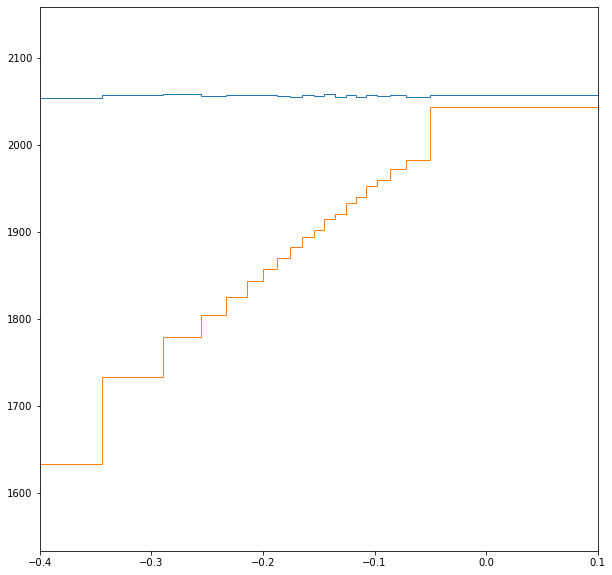

In [288]:
plt.figure(figsize=(10,10))
bin_counts_1, _, _ = plt.hist(pred.flatten(), bins=quantiles, weights=SF*weight_theta(weights,theta=0), histtype='step')
bin_counts_2, _, _ = plt.hist(pred.flatten(), bins=quantiles, weights=SF*weight_theta(weights,theta=0.5), histtype='step')
plt.xlim(-0.4,0.1)
plt.ylim(bottom=min(min(bin_counts_1), min(bin_counts_2))-100,
         top=max(max(bin_counts_1), max(bin_counts_2))+100)
plt.show()

In [125]:
def n_hat(pred, weights, theta, n_quantiles):
    quantiles = weighted_quantile(pred.flatten(), np.linspace(0,1,n_quantiles+1), sample_weight=weight_theta(weights,theta=0))
    return np.histogram(pred.flatten(), bins=quantiles, weights=SF*weight_theta(weights, theta=theta))[0]

In [197]:

[(n_hat(pred, weights, theta=th, n_quantiles=20)/n_hat(pred, weights, theta=0, n_quantiles=20)).sum() for th in np.linspace(-1,1,10)]

[23.34748617820659,
 22.60360039285837,
 21.859714638975664,
 21.11582876173048,
 20.371942896584713,
 19.62805708027801,
 18.884171247184483,
 18.140285371979665,
 17.396399605066176,
 16.652513818860836]

In [218]:
def log_LR(pred, weights, theta, n_quantiles=20):
    quantiles = weighted_quantile(pred.flatten(), np.linspace(0,1,n_quantiles+1), sample_weight=weight_theta(weights,theta=0))
    n_hat_0 = np.histogram(pred.flatten(), bins=quantiles, weights=SF*weight_theta(weights, theta=0))[0]
    n_hat_theta = np.histogram(pred.flatten(), bins=quantiles, weights=SF*weight_theta(weights, theta=theta))[0]
    return -(n_hat_0 * np.log(n_hat_theta) - n_hat_theta).sum() # 

In [219]:
log_LR(pred, weights, theta=1, n_quantiles=20)

-17773.235465814007

In [289]:
x_plot = np.linspace(-3,2,100)
y_plot = np.array([log_LR(pred, weights, theta=x, n_quantiles=20) for x in x_plot])
y_plot_true = np.array([log_LR(w1_0, weights, theta=x, n_quantiles=20) for x in x_plot])

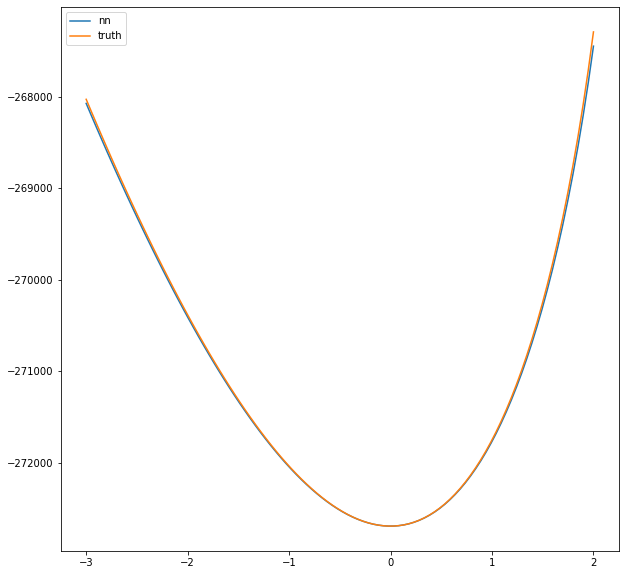

In [290]:
plt.figure(figsize=(10,10))
plt.plot(x_plot, y_plot, label='nn')
plt.plot(x_plot, y_plot_true, label='truth')
plt.legend()

In [2]:
t = (1,3)
list(range(*t))

[1, 2]

In [16]:
user.model_directory

'/groups/hephy/cms/oskar.rothbacher/NN/models/'

In [1]:
isinstance(1., float)

True